In [1]:
#Description: Use the Simple Moving Average Crossoer  Strategy and Python to get buy and sell signals.

In [13]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
from datetime import datetime
plt.style.use('fivethirtyeight')

In [33]:
#load the data
stock_start_date ='2016-08-31'
today='2020-01-09'

In [34]:
def get_my_stock(ticker,start=stock_start_date,end=today):
    data= web.DataReader(ticker,data_source='yahoo',start=start,end=end)
    return data

In [35]:
my_stock=get_my_stock('HDB')
my_stock

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-08-30,36.115002,35.755001,35.755001,35.865002,2019600.0,35.092117
2016-08-31,36.250000,35.825001,36.080002,35.825001,2348600.0,35.052982
2016-09-01,36.375000,35.924999,36.029999,36.290001,1873600.0,35.507961
2016-09-02,36.974998,36.305000,36.610001,36.424999,1870600.0,35.640045
2016-09-06,37.020000,36.505001,36.740002,37.020000,1891400.0,36.222229
...,...,...,...,...,...,...
2020-01-03,63.090000,61.959999,62.930000,62.009998,1491700.0,61.792259
2020-01-06,61.310001,60.369999,61.000000,60.910000,2323000.0,60.696121
2020-01-07,61.470001,60.689999,61.279999,60.689999,1228400.0,60.476894


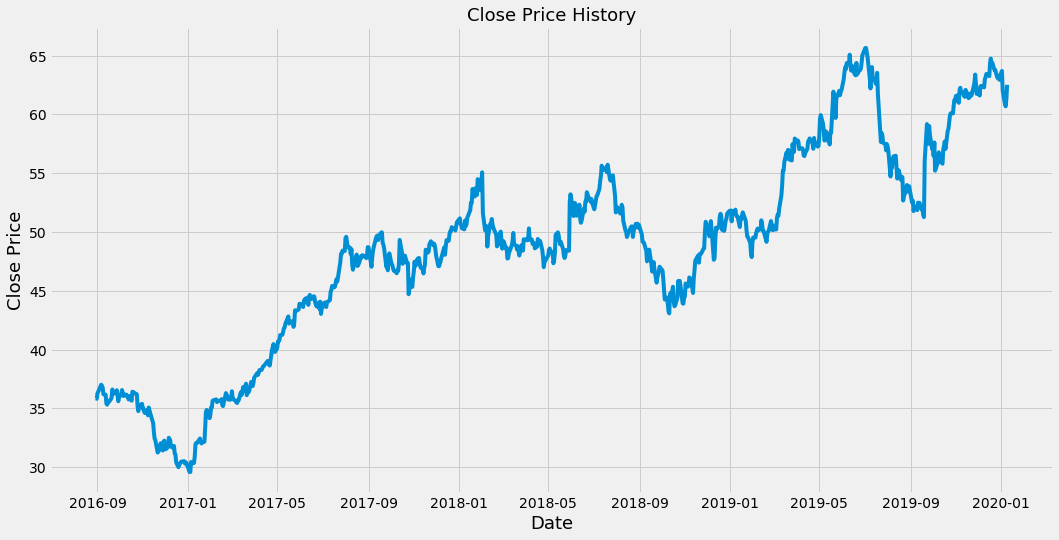

In [37]:
plt.figure(figsize=(16,8))
plt.title('Close Price History', fontsize=18)
plt.plot(my_stock['Close'])
plt.xlabel('Date', fontSize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()

In [38]:
# Create a function to calculate the simple Moving average(SMA)
def SMA(data,period=30,column='Close'):
    return data[column].rolling(window=period).mean()

In [41]:
my_stock['SMA20']=SMA(my_stock,20)# simple moving average for short term
my_stock['SMA50']=SMA(my_stock,50)#simple moving average for the long term

In [45]:
my_stock['signal']=np.where(my_stock['SMA20'] > my_stock['SMA50'],1,0)
my_stock['Position']=my_stock['signal'].diff()

In [46]:
my_stock['Buy']=np.where(my_stock['Position']==1,my_stock['Close'],np.NAN)
my_stock['Sell']=np.where(my_stock['Position']==-1,my_stock['Close'],np.NAN)

In [47]:
my_stock

,High,Low,Open,Close,Volume,Adj Close,SMA20,SMA50,signal,Position,Buy,Sell
Date,,,,,,,,,,,,
2016-08-30,36.115002,35.755001,35.755001,35.865002,2019600.0,35.092117,NaN,NaN,0,NaN,NaN,NaN
2016-08-31,36.250000,35.825001,36.080002,35.825001,2348600.0,35.052982,NaN,NaN,0,0.0,NaN,NaN
2016-09-01,36.375000,35.924999,36.029999,36.290001,1873600.0,35.507961,NaN,NaN,0,0.0,NaN,NaN
2016-09-02,36.974998,36.305000,36.610001,36.424999,1870600.0,35.640045,NaN,NaN,0,0.0,NaN,NaN
2016-09-06,37.020000,36.505001,36.740002,37.020000,1891400.0,36.222229,NaN,NaN,0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-03,63.090000,61.959999,62.930000,62.009998,1491700.0,61.792259,63.3545,62.2622,1,0.0,NaN,NaN
2020-01-06,61.310001,60.369999,61.000000,60.910000,2323000.0,60.696121,63.2785,62.2930,1,0.0,NaN,NaN
2020-01-07,61.470001,60.689999,61.279999,60.689999,1228400.0,60.476894,63.1935,62.3082,1,0.0,NaN,NaN


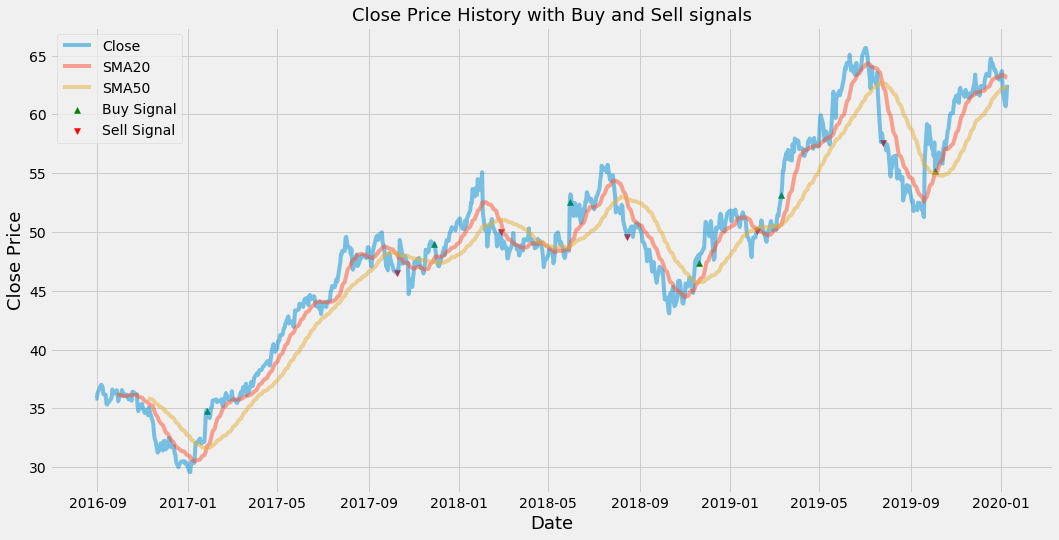

In [52]:
#Visually show the close price with the SMAS Buy & Sell
plt.figure(figsize=(16,8))
plt.title('Close Price History with Buy and Sell signals', fontsize=18)
plt.plot(my_stock['Close'],alpha=0.5,label='Close')
plt.plot(my_stock['SMA20'],alpha=0.5,label='SMA20')
plt.plot(my_stock['SMA50'],alpha=0.5,label='SMA50')
plt.scatter(my_stock.index,my_stock['Buy'],alpha=1,label='Buy Signal',marker ='^',color='green')
plt.scatter(my_stock.index,my_stock['Sell'],alpha=1,label='Sell Signal',marker ='v',color='red')
plt.legend()
plt.xlabel('Date', fontSize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()